In [25]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle
import env
from wrangle import wrangle_zillow


In [2]:
#acquiring prepared data from wrangle module.
df=wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [3]:
# splitting the data into train, validate and test sample. All the exploration will be done on  unscaled train data sample only
train_and_validate, test = train_test_split(df,test_size=.2 ,random_state=123)
train, validate = train_test_split(train_and_validate,test_size=.3,random_state=123)

In [4]:
#creating a sample size of 2000, it makes plotting easier
sample= train.sample(10_000)

In [6]:
print(sample.shape)
sample.columns.tolist()


(10000, 7)


['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

## Univariate Distributions

In [ ]:
sns.countplot(x='bedroomcnt', data=train).set(title='Bedroom')



In [ ]:
sns.boxplot(x='bedroomcnt', data=train).set(title='Bedroom')



In [ ]:
sns.countplot(x='bathroomcnt', data=train).set(title='Bathroom')

In [ ]:
sns.boxplot(x='bathroomcnt', data=train).set(title='Bathroom')

In [ ]:
sns.scatterplot( data= sample, x='bedroomcnt',y='bathroomcnt').set(title='Bed and Bath')

In [ ]:
sns.lmplot(data=sample, x='bedroomcnt', y='bathroomcnt', scatter=True, hue= N)

In [ ]:
sns.violinplot(x='bedroomcnt', y='taxvaluedollarcnt', data=train)

In [ ]:
df.columns


##  3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [7]:
def plot_variable_pairs(df):
    sns.pairplot(data=sample, kind='reg',diag_kind='kde')

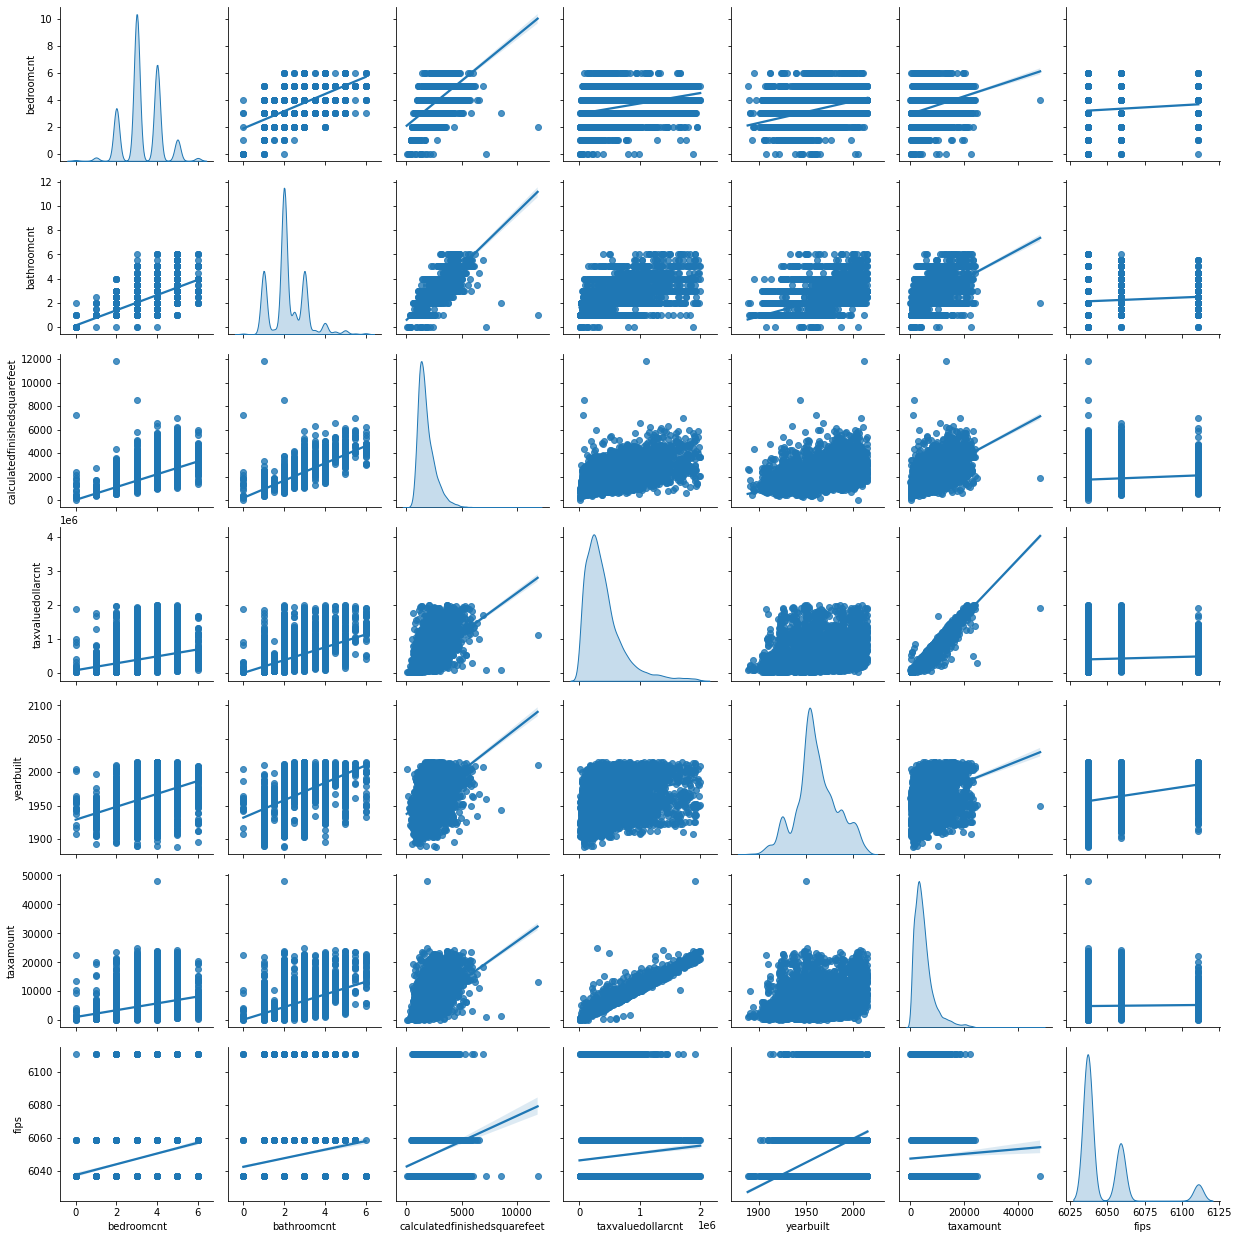

In [8]:
plot_variable_pairs(sample)

# We can drop taxamount column from the pairplot.

 ## 4.Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [12]:
def plot_categorical_and_continuous_vars(df, cat_col, con_col):
    ''' This is the function that takes in a dataframe, 'cat_col'= categorical column and 'con_col'=continuous column
        train sample has 'fips' as categorical  and 'taxvaluedollaracnt','calculatedfinishedsquarefeet' as continuous variable '''
    df= sample
    sns.barplot(x=cat_col,y=con_col, data= sample)
    plt.show()
    sns.boxplot(x=cat_col,y=con_col, data= sample)
    plt.show()
    sns.stripplot(x=cat_col,y=con_col, data= sample)
    plt.show()
    sns.violinplot(data=sample, x=cat_col, y=con_col)
    plt.show()

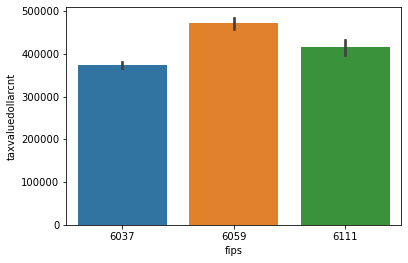

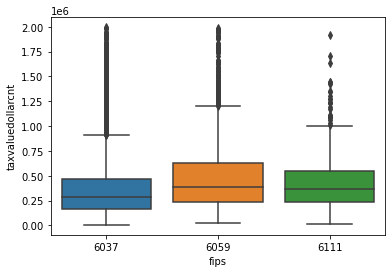

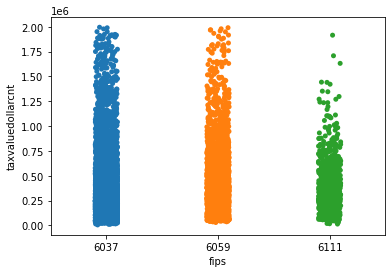

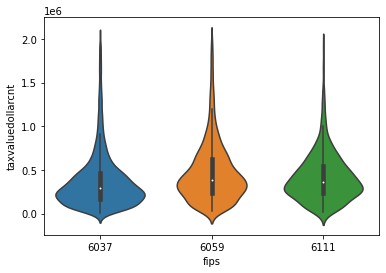

In [13]:
plot_categorical_and_continuous_vars(train,'fips','taxvaluedollarcnt')

#  7. Come up with some initial hypotheses based on your goal of predicting property value.


## Hypopthesis
- $H_0$ : There is no correlation between bedroomcnt/bathroomcnt with the home price i.e taxvaluedollarcount
- $H_a$ : There is a correlation between them.

In [22]:
zillow_corr= train.drop(columns=[ 'taxamount','bedroomcnt','bathroomcnt','fips']).corr(method='spearman')
zillow_corr

,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt
calculatedfinishedsquarefeet,1.000000,0.498040,0.514167
taxvaluedollarcnt,0.498040,1.000000,0.283346
yearbuilt,0.514167,0.283346,1.000000


<AxesSubplot:>

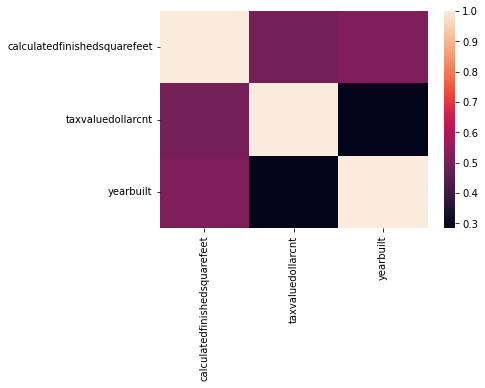

In [23]:
sns.heatmap(zillow_corr)

In [26]:
α= 0.05

r_bed, p_bed = stats.pearsonr(x=train['bedroomcnt'], y=train['taxvaluedollarcnt'])

r_bath, p_bath = stats.pearsonr(x=train['bathroomcnt'], y=train['taxvaluedollarcnt'])

In [27]:
if p_bed < α:
    print('Null hypothesis rejected as p_bed value is less than α ')
else:
    print('Null hypothesis could not be rejected')
    

if p_bath < α:
    print('Null hypothesis rejected as p_bath value is less than α ')
else:
    print('Null hypothesis could not be rejected')

Null hypothesis rejected as p_bed value is less than α 
Null hypothesis rejected as p_bath value is less than α 


In [29]:
# correlation between two independent features
r, p = stats.pearsonr(train['calculatedfinishedsquarefeet'], train['bedroomcnt'])

if p < α:
    print('The number of bedroom is correlated with the square footage.')
    print('The correlation coefficient is {}.'.format(r))
else:
    print('The number of bedroom is NOT correlated with the square footage.')


The number of bedroom is correlated with the square footage.
The correlation coefficient is 0.5162220764081016.
